# Efficient-CapsNet Model Train

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
from utils import Dataset, plotHistory
from models import EfficientCapsNet

Setup GPU for training.

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

Define the model name to use.

In [4]:
model_name = 'PATCH_CAMELYON'

## 1.0 Import the Dataset
All the model hyperparameters are stored in config.json

In [5]:
dataset = Dataset(model_name, config_path='config.json')

[INFO] Dataset loaded!


## 2.0 Load the Model

In [6]:
model_train = EfficientCapsNet(model_name, mode='train', verbose=True)

Model: "Efficient_CapsNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 21, 21, 32)        4736      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 21, 21, 32)        0         
_________________________________________________________________
instance_normalization (Inst (None, 21, 21, 32)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 19, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 19, 19, 64)        0         
_________________________________________________________________
instance_normalization_1 (In (None, 19, 19, 64)  

## 3.0 Train the Model
The number of epochs are in config.json

In [7]:
history = model_train.train(dataset, initial_epoch=0)

------------------------------PATCH_CAMELYON train------------------------------


Epoch 1/50
8192/8192 [==============================] - 150s 18ms/step - loss: 0.5267 - Efficient_CapsNet_loss: 0.1692 - Generator_loss: 0.9122 - Efficient_CapsNet_accuracy: 0.6833 - val_loss: 0.4836 - val_Efficient_CapsNet_loss: 0.1274 - val_Generator_loss: 0.9086 - val_Efficient_CapsNet_accuracy: 0.7917

Epoch 00001: val_Efficient_CapsNet_accuracy improved from -inf to 0.79166, saving model to bin/efficient_capsnet_PATCH_CAMELYON_new_train.h5
Epoch 2/50
8192/8192 [==============================] - 145s 18ms/step - loss: 0.4764 - Efficient_CapsNet_loss: 0.1255 - Generator_loss: 0.8952 - Efficient_CapsNet_accuracy: 0.8005 - val_loss: 0.4721 - val_Efficient_CapsNet_loss: 0.1192 - val_Generator_loss: 0.9001 - val_Efficient_CapsNet_accuracy: 0.8050

Epoch 00002: val_Efficient_CapsNet_accuracy improved from 0.79166 to 0.80499, saving model to bin/efficient_capsnet_PATCH_CAMELYON_new_train.h5
Epoch 3/50
8192/8192 [==============================] - 146s 18ms/step - loss: 0.4646 - Efficient_C

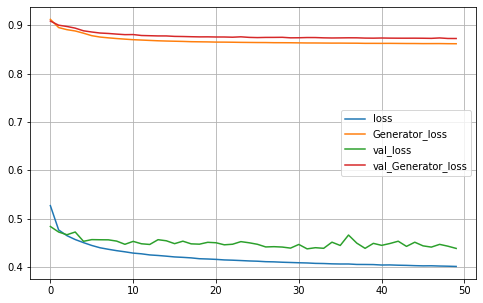

In [8]:
plotHistory(history)